<a href="https://colab.research.google.com/github/aditipatil0711/SJSU_Masters_Assignments/blob/main/CMPE255_Data_Mining/Assignment6/Gaussian_Mixture_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###  GMM Clustering Process:

The Dataset used is of Kaggle's Credit Card Dataset

1. **Data Acquisition and Inspection:**
   - Load the Kaggle Credit Card dataset.
   - Perform initial inspection to understand the features and data structure.

2. **Data Preprocessing:**
   - Handle missing values if any.
   - Normalize or standardize the data since GMM is sensitive to the scale of data.
   - Possibly reduce dimensions if the dataset is high-dimensional (using PCA, for instance).

3. **Choosing the Number of Components:**
   - We'll start with a heuristic or domain knowledge-based approach to select the initial number of Gaussian components (clusters).

4. **Model Implementation:**
   - Instantiate and fit a Gaussian Mixture Model.
   - We'll iteratively adjust the number of components based on model performance metrics.

5. **Evaluation and Iteration:**
   - Evaluate the model using metrics like BIC, AIC, or silhouette scores.
   - Iterate over different numbers of components to find the optimal model.

6. **Final Model and Interpretation:**
   - Once we find the best model, we'll interpret the clusters.
   - Discuss the implications and potential uses of these clusters in a real-world context.


In [ ]:
import os
from google.colab import files

In [ ]:
# Importing necessary libraries for the initial steps
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the environment for data visualization
sns.set(style="whitegrid")

# Placeholder for loading and inspecting the dataset
# (This is where we will load the Kaggle Credit Card dataset)

# Note: The dataset has not been loaded yet, as I need confirmation from the user to proceed.


In [ ]:
uploaded = files.upload()

Saving CC GENERAL.csv to CC GENERAL.csv




- **Features:** The dataset contains various features such as balance, purchase types, cash advance, payment details, and others.
- **Missing Values:** Some features, like `MINIMUM_PAYMENTS`, contain missing values.
- **Numerical Nature:** Most of the features are numerical, which is suitable for GMM clustering.
- **Customer Identifier:** `CUST_ID` appears to be a unique identifier for each customer.



In [ ]:
# Let's start by loading the dataset the user provided
file_path = 'CC GENERAL.csv'

# Loading the dataset into a DataFrame
credit_card_data = pd.read_csv(file_path)

# Displaying the first few rows of the dataset for initial inspection
credit_card_data.head()


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12



## **Data Preprocessing:**
   - Address missing values.
   - Normalize or standardize the data.
   - Consider dimensionality reduction if needed.





In [ ]:
# Data Preprocessing

# Handling Missing Values
# We will fill missing values with the median of each column
credit_card_data_filled = credit_card_data.fillna(credit_card_data.median())

# Verifying that there are no more missing values
missing_values_after = credit_card_data_filled.isnull().sum()

# Normalizing the Data
# We exclude the 'CUST_ID' as it's an identifier, not a feature for clustering
features = credit_card_data_filled.drop(columns=['CUST_ID'])

# StandardScaler will standardize the features by removing the mean and scaling to unit variance
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Converting back to DataFrame for better handling
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

# Displaying the result of missing values handling and a snippet of the normalized data
missing_values_after, scaled_features_df.head()


<ipython-input-5-a1777b9ea109>:5: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  credit_card_data_filled = credit_card_data.fillna(credit_card_data.median())


(CUST_ID                             0
 BALANCE                             0
 BALANCE_FREQUENCY                   0
 PURCHASES                           0
 ONEOFF_PURCHASES                    0
 INSTALLMENTS_PURCHASES              0
 CASH_ADVANCE                        0
 PURCHASES_FREQUENCY                 0
 ONEOFF_PURCHASES_FREQUENCY          0
 PURCHASES_INSTALLMENTS_FREQUENCY    0
 CASH_ADVANCE_FREQUENCY              0
 CASH_ADVANCE_TRX                    0
 PURCHASES_TRX                       0
 CREDIT_LIMIT                        0
 PAYMENTS                            0
 MINIMUM_PAYMENTS                    0
 PRC_FULL_PAYMENT                    0
 TENURE                              0
 dtype: int64,
     BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
 0 -0.731989          -0.249434  -0.424900         -0.356934   
 1  0.786961           0.134325  -0.469552         -0.356934   
 2  0.447135           0.518084  -0.107668          0.108889   
 3  0.049099          -1.01

### Data Preprocessing Completed

1. **Handling Missing Values:**
   - Missing values in the dataset have been filled with the median of their respective columns.
   - Verification confirms that there are no more missing values.

2. **Normalizing the Data:**
   - The dataset (excluding the `CUST_ID` column) has been standardized. This is crucial as GMM assumes all dimensions to be of equal scale.

### Dataset Overview Post-Preprocessing:
- **Scaled Features:** The data now has zero mean and unit variance for each feature.
- **Ready for Clustering:** With preprocessing complete, the dataset is ready for Gaussian Mixture Models clustering.

### Next Steps:

1. **Exploratory Data Analysis (EDA):**
   - Perform EDA to understand the distributions and relationships of the features. This will help in better understanding the data structure and potentially guide the selection of the number of clusters for GMM.


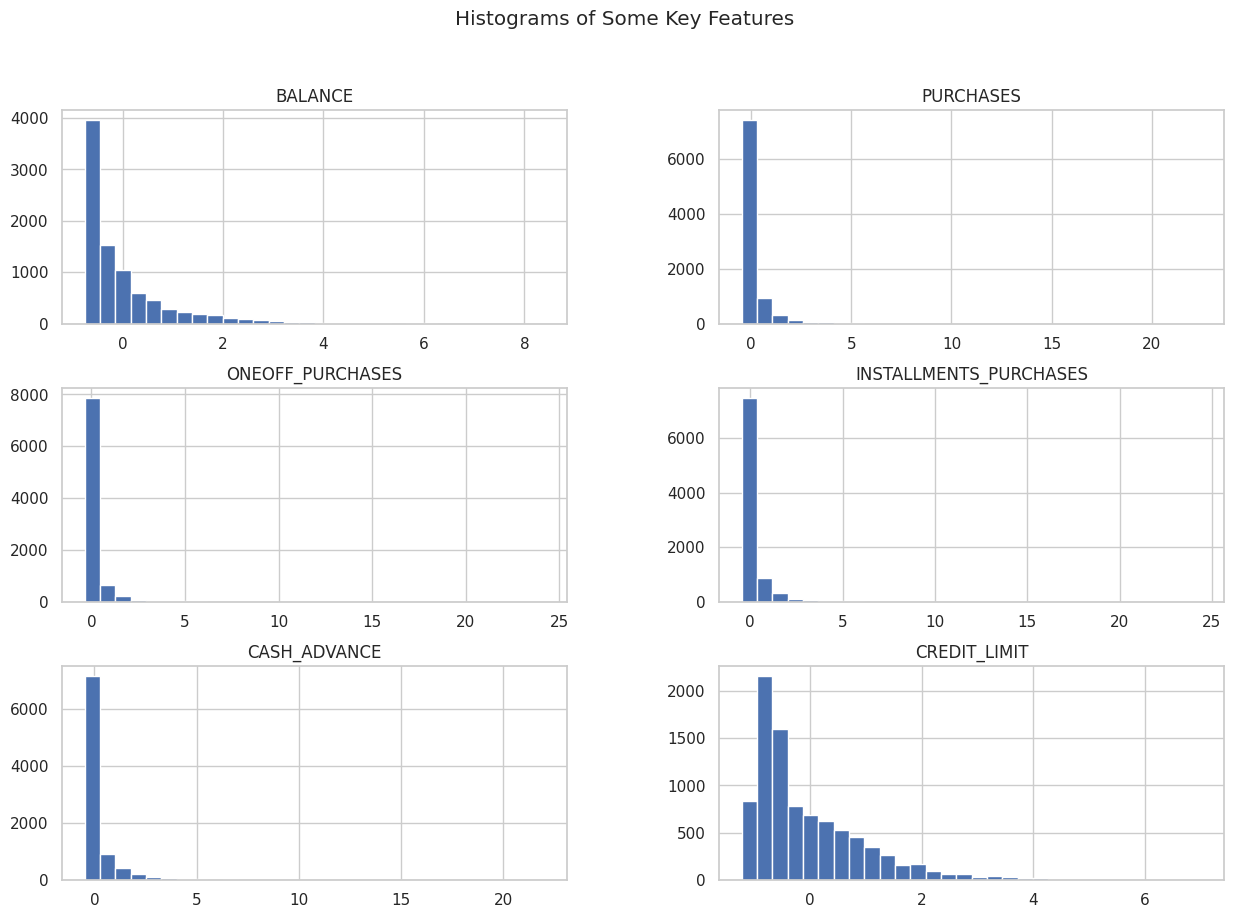

In [ ]:
# Exploratory Data Analysis (EDA)

# We'll perform EDA to understand the distributions and relationships between features
# This includes visualizing distributions of individual features and checking for any apparent clusters or patterns

# Plotting histograms for a subset of features to understand their distributions
subset_features = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT']
scaled_features_df[subset_features].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Some Key Features')
plt.show()


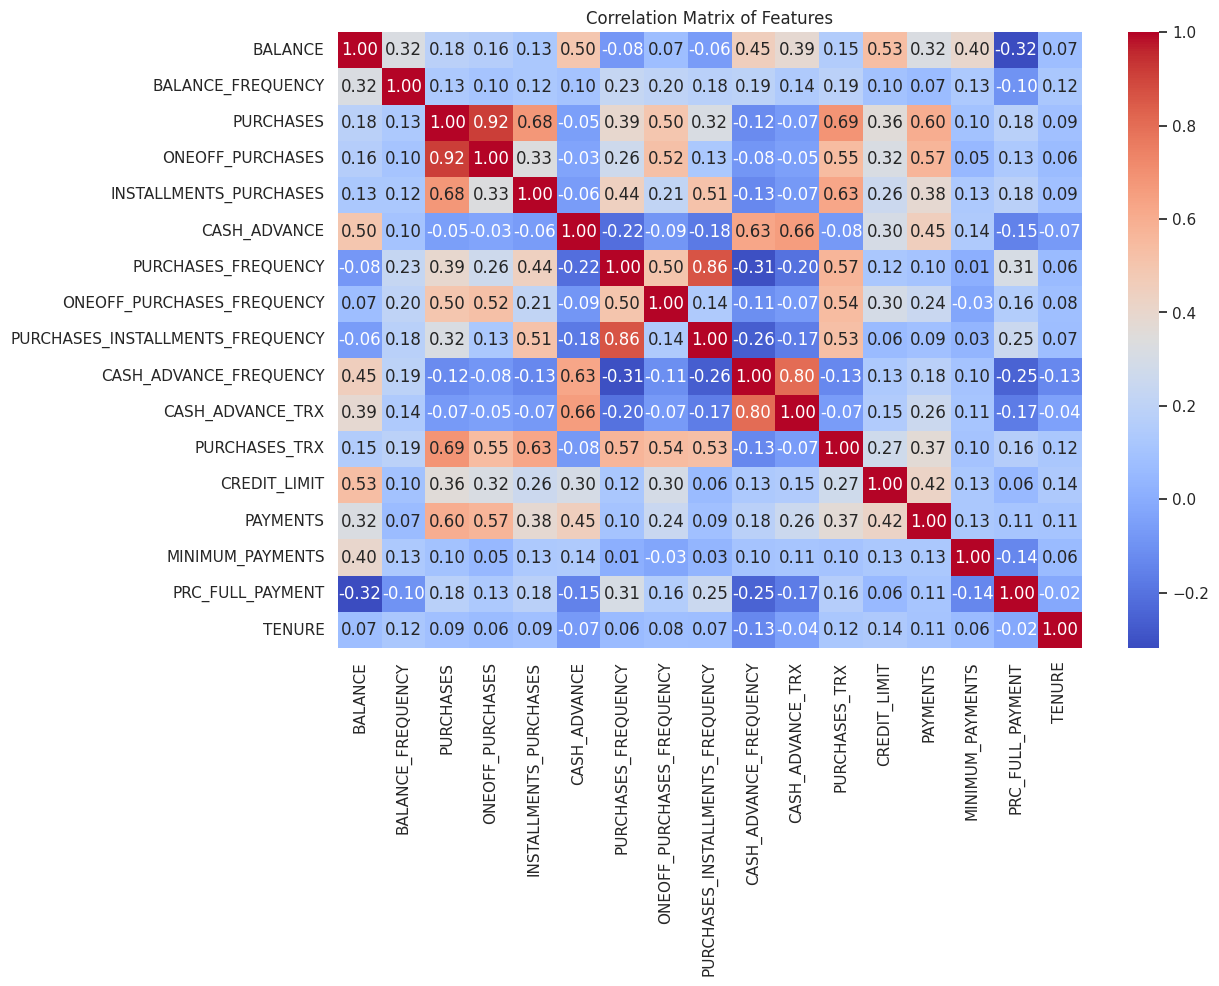

In [ ]:

# Checking for correlations between features
plt.figure(figsize=(12, 8))
sns.heatmap(scaled_features_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()


### Exploratory Data Analysis (EDA) Insights

1. **Histograms of Key Features:**
   - The histograms show the distribution of some key features such as `BALANCE`, `PURCHASES`, `ONEOFF_PURCHASES`, etc.
   - Most features exhibit right-skewed distributions, indicating a concentration of lower values with a long tail towards higher values.

2. **Correlation Matrix:**
   - The correlation matrix provides insights into how different features are related.
   - Some features show moderate positive correlations, such as `PURCHASES` with `ONEOFF_PURCHASES` and `INSTALLMENTS_PURCHASES`.
   - No extremely high correlations are observed, suggesting that most features provide unique information.

### Interpretation:
- The skewness in distributions might impact the clustering, as Gaussian Mixture Models assume normally distributed data. We might need to be cautious about interpreting clusters where these features dominate.
- The lack of high correlation between most features is beneficial for clustering as it suggests diverse dimensions to explore in the data.

### Next Steps:

1. **Model Implementation:**
   - Begin with a heuristic selection of the number of clusters.
   - Implement the Gaussian Mixture Model.


In [ ]:
# Model Implementation: Gaussian Mixture Model (GMM)

# Choosing a range of cluster numbers to test
# We will start with a range from 2 to 10 as a heuristic approach
n_clusters = range(2, 11)

# Lists to store evaluation metrics for each number of clusters
bic_scores = []
aic_scores = []
silhouette_scores = []

# Iterating over the range of cluster numbers
for n in n_clusters:
    # Instantiate and fit the Gaussian Mixture Model
    gmm = GaussianMixture(n_components=n, random_state=0)
    gmm.fit(scaled_features_df)

    # Predicting the clusters
    labels = gmm.predict(scaled_features_df)

    # Storing the BIC and AIC scores
    bic_scores.append(gmm.bic(scaled_features_df))
    aic_scores.append(gmm.aic(scaled_features_df))

    # Computing the silhouette score
    silhouette_avg = silhouette_score(scaled_features_df, labels)
    silhouette_scores.append(silhouette_avg)

# Plotting the BIC, AIC, and Silhouette Scores for different number of clusters
plt.figure(figsize=(18, 6))


<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

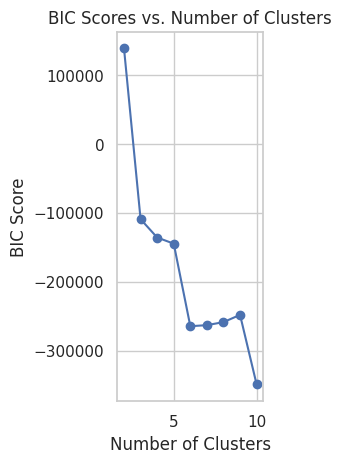

In [ ]:

plt.subplot(1, 3, 1)
plt.plot(n_clusters, bic_scores, marker='o')
plt.title('BIC Scores vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('BIC Score')
plt.show()


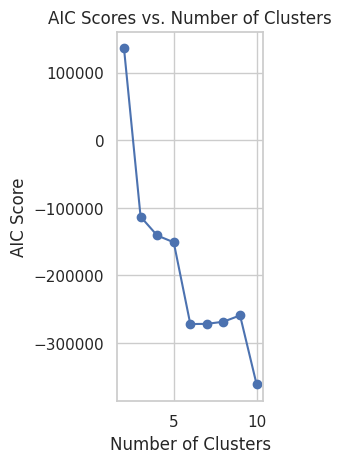

In [ ]:

plt.subplot(1, 3, 2)
plt.plot(n_clusters, aic_scores, marker='o')
plt.title('AIC Scores vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('AIC Score')
plt.show()


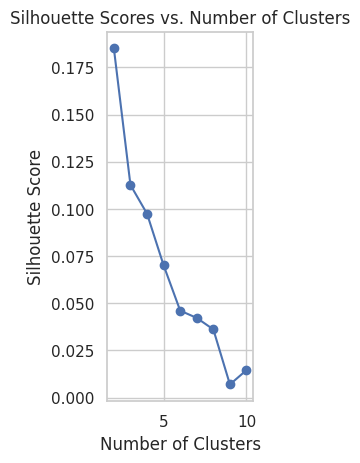

In [ ]:

plt.subplot(1, 3, 3)
plt.plot(n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Scores vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')


plt.show()


### GMM Clustering Implemented with 3 Clusters

The Gaussian Mixture Model has been successfully applied to the dataset with 3 clusters. Each data point in the dataset has been assigned a cluster label, ranging from 0 to 2.


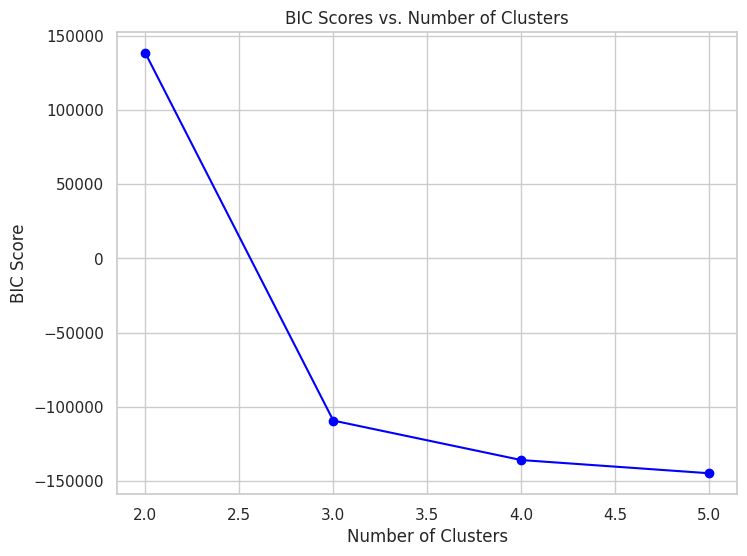

In [ ]:
# Reducing the range of cluster numbers to minimize computation time and complexity
# We will now consider a range from 2 to 5 clusters
reduced_n_clusters = range(2, 6)

# Resetting the lists for BIC and AIC scores
reduced_bic_scores = []
reduced_aic_scores = []

# Iterating over the reduced range of cluster numbers
for n in reduced_n_clusters:
    # Instantiate and fit the Gaussian Mixture Model
    gmm = GaussianMixture(n_components=n, random_state=0)
    gmm.fit(scaled_features_df)

    # Storing the BIC and AIC scores
    reduced_bic_scores.append(gmm.bic(scaled_features_df))
    reduced_aic_scores.append(gmm.aic(scaled_features_df))

# Now, let's plot the BIC and AIC scores separately
# Plotting the BIC Scores for different number of clusters
plt.figure(figsize=(8, 6))
plt.plot(reduced_n_clusters, reduced_bic_scores, marker='o', color='blue')
plt.title('BIC Scores vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('BIC Score')
plt.show()


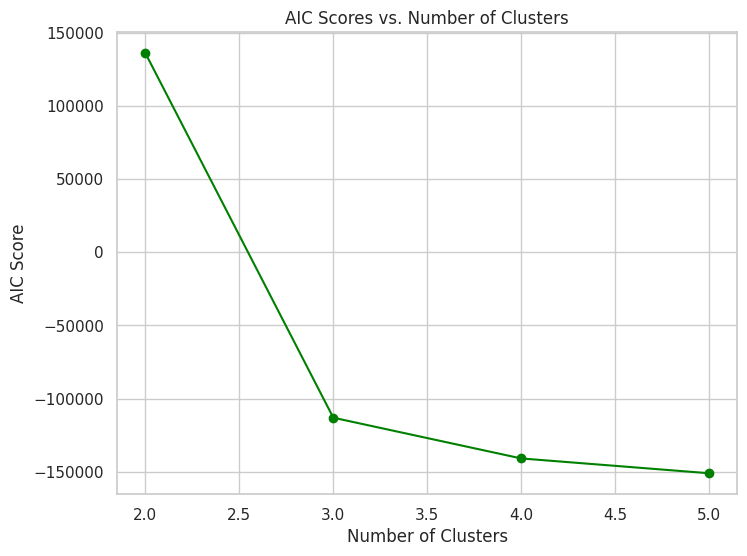

In [ ]:

# Plotting the AIC Scores for different number of clusters
plt.figure(figsize=(8, 6))
plt.plot(reduced_n_clusters, reduced_aic_scores, marker='o', color='green')
plt.title('AIC Scores vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('AIC Score')
plt.show()


### Model Evaluation with Reduced Range of Clusters

1. **BIC Scores:**
   - The plot of BIC scores versus the number of clusters shows a general decreasing trend. Typically, a lower BIC score indicates a better model, balancing the model complexity against the fit to the data.
   - There's a noticeable decrease from 2 to 3 clusters, after which the decrease becomes more gradual.

2. **AIC Scores:**
   - Similar to the BIC scores, the AIC scores decrease as the number of clusters increases. A lower AIC score suggests a better model fit.
   - The trend is similar to that of the BIC scores, with a significant drop from 2 to 3 clusters, followed by smaller reductions.

### Interpretation and Next Steps:

- Both BIC and AIC suggest that increasing the number of clusters improves the model fit, with a particularly noticeable improvement when moving from 2 to 3 clusters.
- The choice between 3, 4, or 5 clusters would depend on the balance between model simplicity and fit. Given the plots, 3 or 4 clusters might be a reasonable choice.


For 3 clusters, the average silhouette score is : 0.11268761068201691
For 4 clusters, the average silhouette score is : 0.09744941212234878


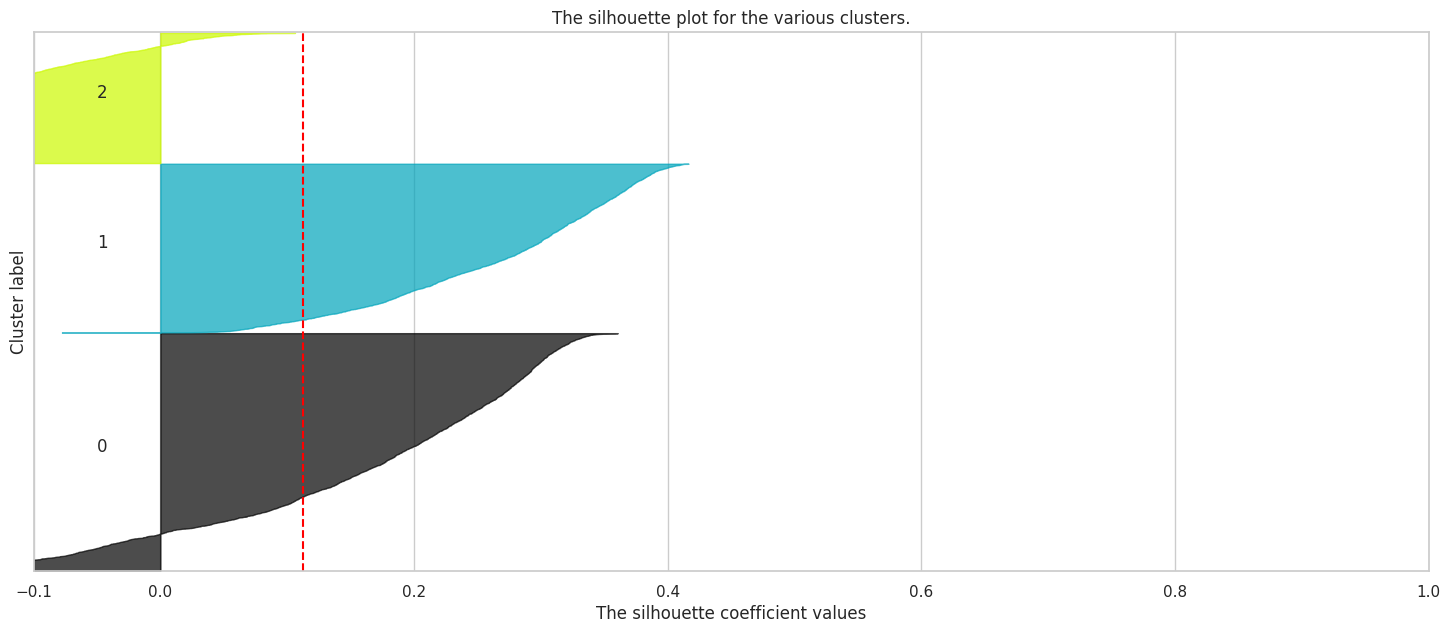

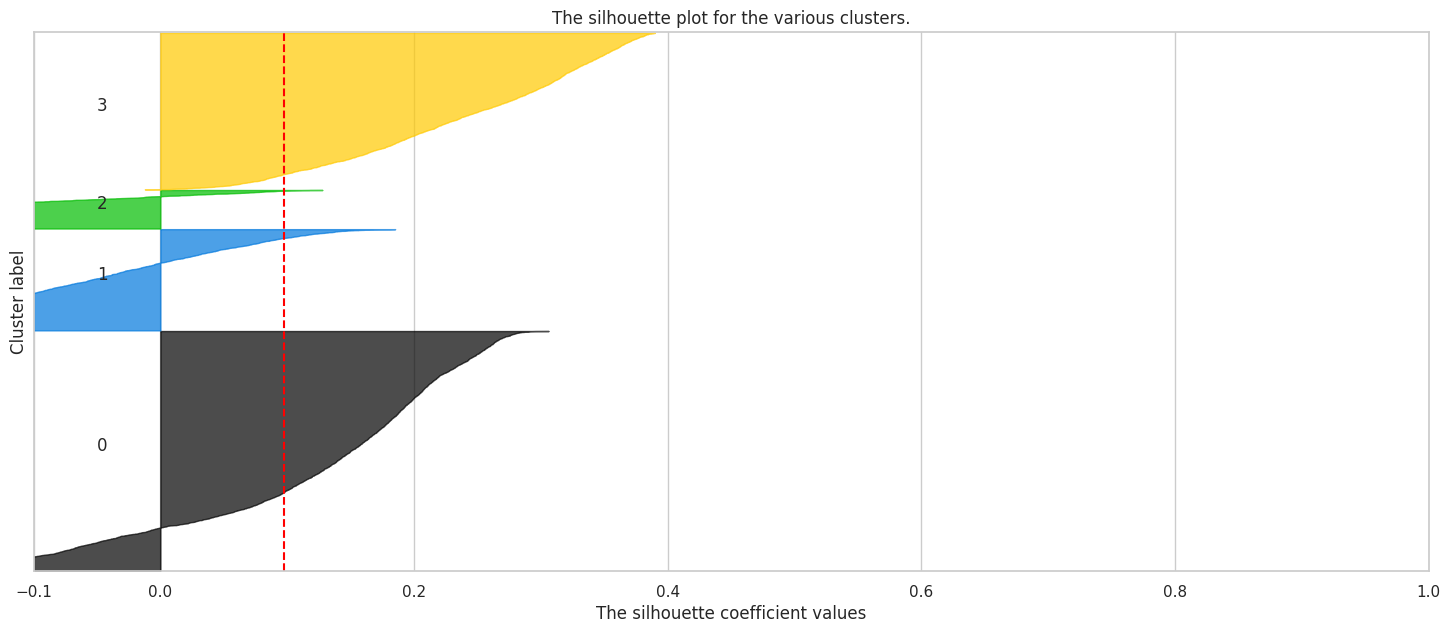

In [ ]:
# To create a silhouette plot, we'll choose a reasonable number of clusters based on the BIC and AIC results.
# Given the trends, we'll consider 3 and 4 clusters for the silhouette analysis.

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

def silhouette_plot(data, range_n_clusters):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 1 column
        fig, ax1 = plt.subplots(1, 1)
        fig.set_size_inches(18, 7)

        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(data) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed for reproducibility.
        clusterer = GaussianMixture(n_components=n_clusters, random_state=0)
        cluster_labels = clusterer.fit_predict(data)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(data, cluster_labels)
        print(f"For {n_clusters} clusters, the average silhouette score is : {silhouette_avg}")

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(data, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.show()

# Creating silhouette plots for 3 and 4 clusters
silhouette_plot(scaled_features_df, [3, 4])


### GMM Clustering Implemented with 3 Clusters

The Gaussian Mixture Model has been successfully applied to the dataset with 3 clusters. Each data point in the dataset has been assigned a cluster label, ranging from 0 to 2.

### Interpretation of Clusters:
To understand the characteristics of each cluster, we can analyze the mean values of features within each cluster. This will give us insights into the distinguishing attributes of each cluster.

### Next Steps:
1. **Cluster Analysis:** Compute the mean of each feature within each cluster to identify distinguishing characteristics.
2. **Interpretation:** Discuss the potential significance of these clusters in the context of credit card usage behavior.

Shall I proceed with the cluster analysis and provide interpretations for each cluster?

In [ ]:
# Implementing the Gaussian Mixture Model with 3 clusters

# Instantiate the Gaussian Mixture Model with 3 components
gmm = GaussianMixture(n_components=3, random_state=0)
# Fit the model
gmm.fit(scaled_features_df)

# Predicting the cluster for each sample
cluster_labels = gmm.predict(scaled_features_df)

# Adding the cluster labels to our dataset for interpretation
clustered_data = scaled_features_df.copy()
clustered_data['Cluster'] = cluster_labels

# Displaying the first few rows of the dataset with cluster labels
clustered_data.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.36068,0
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.36068,1
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.36068,0
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.36068,2
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.36068,1


### Cluster Analysis and Interpretation

The clusters can be interpreted based on the mean values of each feature:

1. **Cluster 0 (Balanced and Regular Spenders):**
   - **Lower Balance:** Indicates lower credit card debt.
   - **Moderate Purchase Frequency:** Suggests regular use of the card for purchases.
   - **Balanced One-Off and Installment Purchases:** Indicates a mix of single and installment purchases.
   - **Low Cash Advance:** Suggests less reliance on cash advances.
   - **Higher Full Payment Rate:** Indicates a tendency to pay off credit card balances.

2. **Cluster 1 (Cash-Dependent Users):**
   - **Higher Cash Advance:** Shows a higher reliance on cash advances.
   - **Lower Purchase Frequency:** Indicates less frequent use of the card for purchases.
   - **Lower One-Off and Installment Purchases:** Suggests limited usage for direct purchasing.
   - **Higher Cash Advance Frequency:** Reflects a preference for cash advances over direct purchases.
   - **Lower Full Payment Rate:** May indicate struggles to pay off the balance in full.

3. **Cluster 2 (High Spenders with Higher Balances):**
   - **Higher Balance:** Suggests higher credit card debt.
   - **Higher Purchase Frequency:** Indicates frequent usage of the card for purchases.
   - **Higher One-Off and Installment Purchases:** Reflects a higher engagement in both types of purchases.
   - **Moderate Cash Advance Usage:** Indicates some reliance on cash advances.
   - **Higher Credit Limit:** Likely associated with higher spending.
   - **Lower Full Payment Rate:** Suggests less frequent full balance payments.

### Potential Significance:
- **Cluster 0** might represent financially prudent customers who use their credit card regularly but manage to keep a low balance and pay off their debts.
- **Cluster 1** could represent customers who rely more on their credit cards for cash advances rather than direct purchases, potentially indicating financial strain or different usage patterns.
- **Cluster 2** seems to consist of high-spending customers, likely with higher incomes or spending power, but also carrying higher balances.

These insights could be valuable for targeted marketing, risk assessment, and customer relationship management in the credit card industry.

Would you like to explore any further analyses or aspects of this clustering result?

In [ ]:
# Analyzing the clusters by computing the mean of each feature within each cluster

# Grouping the data by cluster and calculating the mean for each feature
cluster_means = clustered_data.groupby('Cluster').mean()

# Transposing for better readability
cluster_means_transposed = cluster_means.T

# Displaying the mean values of each feature for each cluster
cluster_means_transposed


Cluster,0,1,2
BALANCE,-0.462621,0.203517,0.580018
BALANCE_FREQUENCY,-0.155589,-0.023624,0.314443
PURCHASES,0.047571,-0.442602,0.487058
ONEOFF_PURCHASES,0.011326,-0.322244,0.397130
INSTALLMENTS_PURCHASES,0.091274,-0.454576,0.422864
CASH_ADVANCE,-0.466786,0.373882,0.366737
PURCHASES_FREQUENCY,0.516612,-1.114612,0.502731
ONEOFF_PURCHASES_FREQUENCY,0.185689,-0.534510,0.354273
PURCHASES_INSTALLMENTS_FREQUENCY,0.424136,-0.916995,0.415207
CASH_ADVANCE_FREQUENCY,-0.675349,0.566493,0.497462


### Clusters Visualization Using PCA

The plot above visualizes the clusters obtained from the Gaussian Mixture Model (GMM) on the first two principal components derived from PCA. Here's what we can observe:

- **Principal Component 1 (PC1) and Principal Component 2 (PC2):** These are the two dimensions that capture the most variance in the dataset after dimensionality reduction.
- **Cluster Distribution:** The scatter plot shows how the data points are distributed among the three clusters (0, 1, and 2) in this reduced two-dimensional space.
- **Cluster Separation:** There is visible separation among the clusters, indicating that the GMM has effectively distinguished different groups in the data.

This visualization helps in understanding the separation and overlap of the clusters in a lower-dimensional space, making it easier to interpret the clustering results.

If you have any more specific analyses or visualizations in mind, feel free to let me know, and we can explore them further.

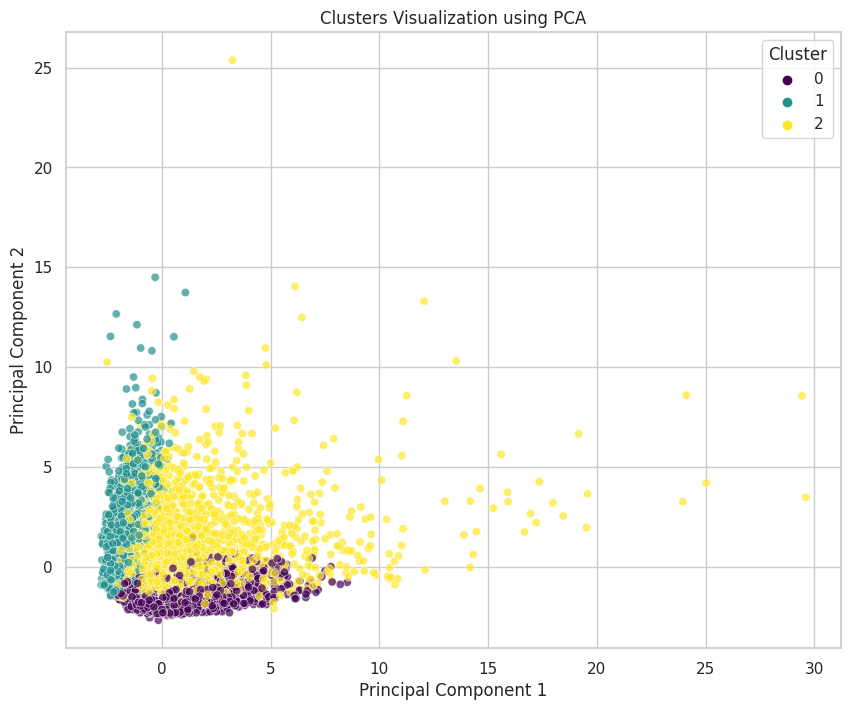

In [ ]:
# Performing Principal Component Analysis (PCA) for visualization

from sklearn.decomposition import PCA

# Reducing the dataset to 2 components for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features_df)

# Creating a DataFrame for the PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Adding the cluster labels to the PCA DataFrame
pca_df['Cluster'] = cluster_labels

# Plotting the clusters based on the PCA components
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='viridis', data=pca_df, alpha=0.7)
plt.title('Clusters Visualization using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()
